In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import string
import re
from nltk import sent_tokenize , word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk

nltk.download('stopwords')


import nltk
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data = pd.read_csv('sentiment_analysis.csv')

In [4]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [6]:
data.describe()

,Year,Month,Day
count,499.000000,499.000000,499.000000
mean,2020.394790,6.084168,15.693387
std,2.830991,3.652711,8.804673
min,2010.000000,1.000000,1.000000
25%,2019.000000,2.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000


In [7]:
data.shape

(499, 7)

In [8]:
data.isna().sum()

,0
Year,0
Month,0
Day,0
Time of Tweet,0
text,0
sentiment,0
Platform,0


<Axes: ylabel='count'>

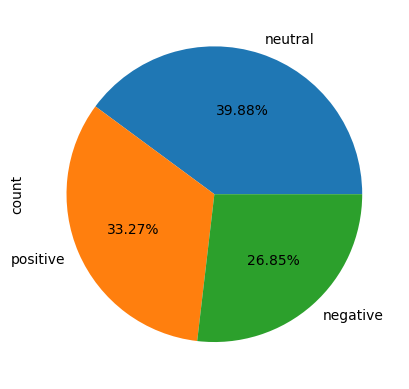

In [9]:
# Pie chart
data["sentiment"].value_counts().plot(kind = "pie" , autopct = "%0.2f%%")

<ipython-input-10-220c7c39ceb2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=data, palette=colors)


<Axes: xlabel='sentiment', ylabel='count'>

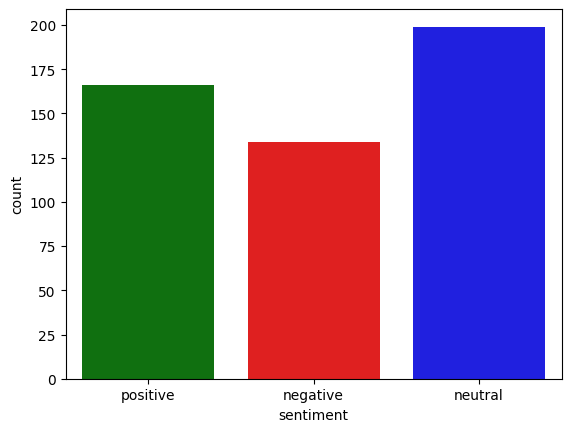

In [10]:
# Count Plot
colors = ["green", "red", "blue"]
sns.countplot(x="sentiment", data=data, palette=colors)

In [11]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [12]:
data.tail()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter
498,2019,3,25,morning,"actually, I wish I was back in Tahoe. I miss...",negative,Instagram


In [13]:
# Create Data frame
df = data.loc[:,("text", "sentiment")]

In [14]:
df.head()

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative


In [15]:
df["total_alphabets"] = df["text"].apply(len)

In [16]:
df.head()

,text,sentiment,total_alphabets
0,What a great day!!! Looks like dream.,positive,37
1,"I feel sorry, I miss you here in the sea beach",positive,46
2,Don't angry me,negative,14
3,We attend in the class just for listening teac...,negative,84
4,"Those who want to go, let them go",negative,33


In [17]:
# Average (mean) number of alphabets
mean_alpha = [df[df["sentiment"] == "positive"]["total_alphabets"].mean() , df[df["sentiment"] == "negative"]["total_alphabets"].mean() , df[df["sentiment"] == "neutral"]["total_alphabets"].mean()]

<ipython-input-18-6c49d9afa7f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = target ,y = mean_alpha, palette=colors)


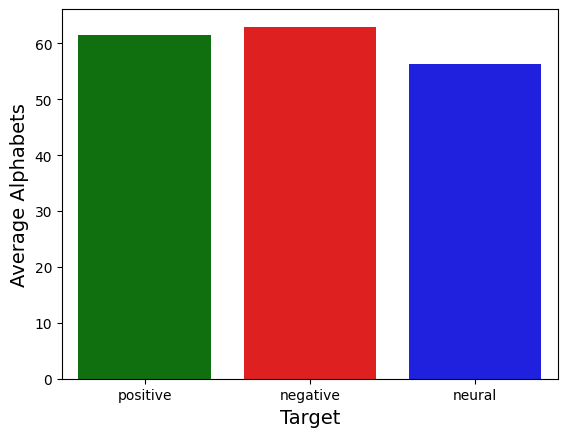

In [18]:
target = ["positive" , "negative" , "neural"]
colors = ["green", "red", "blue"]
sns.barplot(x = target ,y = mean_alpha, palette=colors)
plt.xlabel("Target", fontsize = 14)
plt.ylabel("Average Alphabets" , fontsize = 14)
plt.show()

In [19]:
punc = string.punctuation

def remove_punctuation(text):
  lst = []
  text.lower()
  for word in text:
    if word not in punc:
      lst.append(word)

  x = lst[:]
  lst.clear()
  return "".join(x)


df["text"] = df["text"].apply(remove_punctuation)

In [20]:
df.head()

,text,sentiment,total_alphabets
0,What a great day Looks like dream,positive,37
1,I feel sorry I miss you here in the sea beach,positive,46
2,Dont angry me,negative,14
3,We attend in the class just for listening teac...,negative,84
4,Those who want to go let them go,negative,33


In [21]:
stop = stopwords.words("english")

def remove_stopwords(text):
    lst = []

    for word in text.split():
        if word not in stop:
            lst.append(word)

    x = lst[:
           ]
    lst.clear()
    return " ".join(x)


df["text"] = df["text"].apply(remove_stopwords)

In [22]:
df.head()

,text,sentiment,total_alphabets
0,What great day Looks like dream,positive,37
1,I feel sorry I miss sea beach,positive,46
2,Dont angry,negative,14
3,We attend class listening teachers reading sli...,negative,84
4,Those want go let go,negative,33


In [23]:
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
ps = PorterStemmer()

def stemming(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [ps.stem(word) for word in words]
    return " ".join(stemmed_words)

df["text"].apply(stemming)

,text
0,what great day look like dream
1,i feel sorri i miss sea beach
2,dont angri
3,we attend class listen teacher read slide just...
4,those want go let go
...,...
494,accord quarter famili six live poverti
495,plan spend money go well
496,upload bamboozl pictur facebook
497,congratul guy finish month earli booo


In [25]:
le = LabelEncoder()

X = df["text"]

Y = le.fit_transform(df["sentiment"])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], Y, test_size=0.2, random_state=42)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(399,)
(100,)
(399,)
(100,)


In [27]:
cv = CountVectorizer(ngram_range=(1,2), max_features=2500, binary=True)

In [28]:
X_train_bow = cv.fit_transform(X_train).toarray()

X_test_bow = cv.transform(X_test).toarray()

In [29]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(399, 2500)
(100, 2500)


In [30]:
mnb = MultinomialNB()

mnb.fit(X_train_bow , y_train)

y_pred_mnb = mnb.predict(X_test_bow)

print(accuracy_score(y_test , y_pred_mnb))

0.69


In [31]:
def preprocess_text(text):
    text = remove_punctuation(text)  # Your remove_punctuation function
    text = remove_stopwords(text)  # Your remove_stopwords function
    text = stemming(text)  # Your stemming function
    return text

# Get user input
new_text = input("Enter text to analyze: ")
# Preprocess the input text
processed_text = preprocess_text(new_text)

Enter text to analyze: hell


In [32]:
new_text_bow = cv.transform([processed_text]).toarray()

In [33]:
# Predict using each model
mnb_prediction = mnb.predict(new_text_bow)[0]  # Get the prediction (0, 1, or 2)

label_mapping = {
        0: "negative",
        1: "neutral",
        2: "positive"
    }

# Map predictions to sentiment labels
mnb_sentiment = label_mapping[mnb_prediction]  # Using your label_mapping dictionary

In [34]:
print("RandomForest Prediction:", mnb_sentiment)

RandomForest Prediction: neutral


In [35]:
import joblib

# Save the CountVectorizer
joblib.dump(cv, 'count_vectorizer.pkl')

# Save the MultinomialNB model
joblib.dump(mnb, 'sentiment_model.pkl')

['sentiment_model.pkl']